Lab 6 Confidence intervals

In this lab, we will be working on the background for the main activity of the LHC datasets we are working on. We will first generating a fake poisson distribution with a mean of 100.

Problem 1 

We are now going to to look at our background distribution and determine where the 5𝜎 sensitivity threshold is. 

Text(0, 0.5, 'Probability')

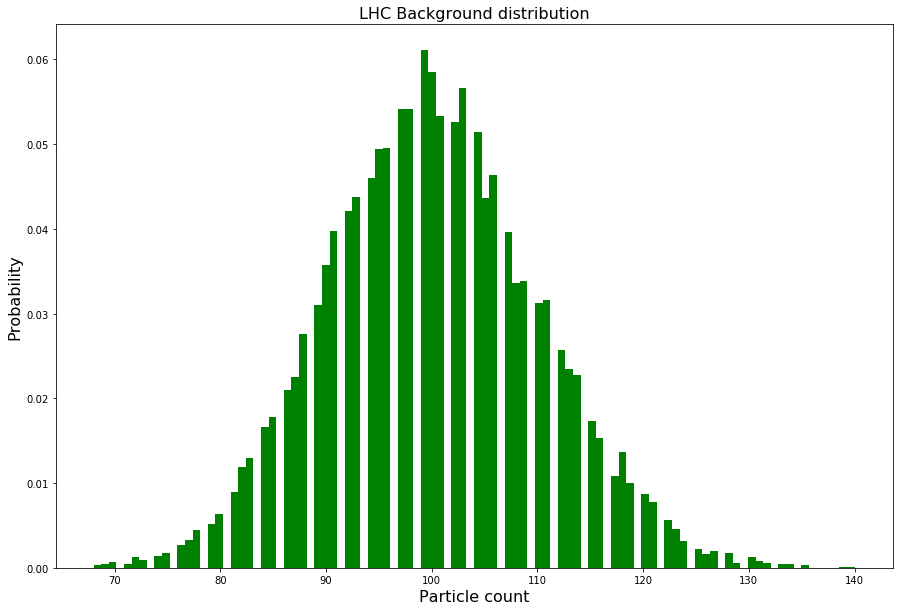

In [224]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
plt.rcParams["figure.figsize"] = (15,10)

mu = 100
d = stats.poisson.rvs(mu, size = 10000)
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True, color = 'g')
ax.set_title('LHC Background distribution', fontsize = 16)
ax.set_xlabel('Particle count', fontsize = 16)
ax.set_ylabel('Probability', fontsize = 16)

Now we will find the 5𝜎 sensitivity threshold.To achieve this, we are going to find the probability of having a 5𝜎 sensitivity in a standard normal distribution, and then, we will use the probability we got to find the value of the corresponding particle counts in our poisson distribution using a mean of 100.

In [225]:
mu = 100
sigma = 5
prob= stats.norm.sf(sigma)
print(stats.poisson.isf(prob,mu))

154.0


Based on our calculation, the 5𝜎 sensitivity threshold of our poisson distribution is 154.

Problem 2

Problem 2 A)

In this problem, we will inject a signal with a strength of 15𝜎 for 1000 times.

Text(0, 0.5, 'Probability')

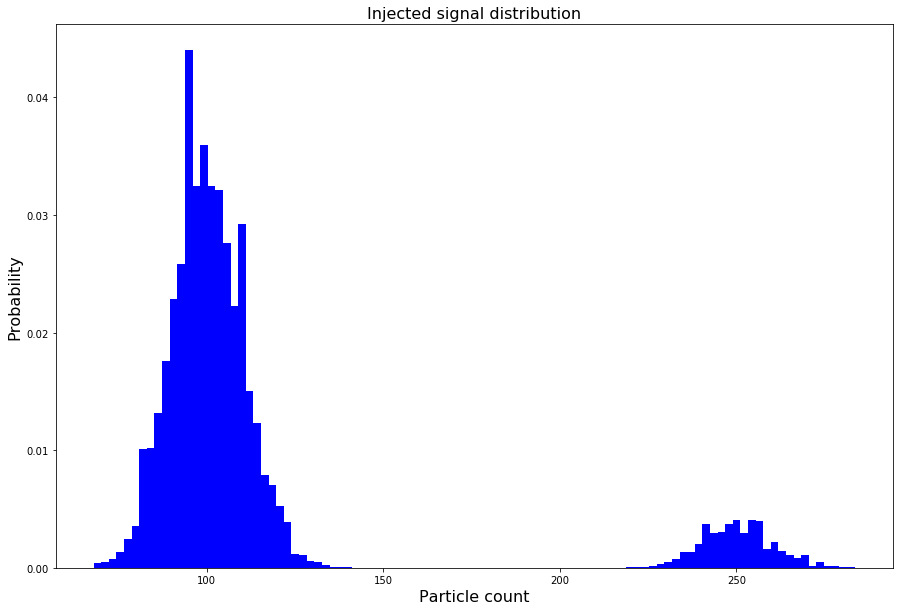

In [226]:
inject_sig = np.std(d) * 15
sig = np.zeros(len(d))

for x in range (1000):
    rand = np.random.randint(0, len(sig))
    sig[rand] = inject_sig
    
new_sig = sig + d

fx, ax = plt.subplots(1, 1)
ax.hist(new_sig,100, density=True, color = 'b', histtype = 'bar')
ax.set_title('Injected signal distribution', fontsize = 16)
ax.set_xlabel('Particle count', fontsize = 16)
ax.set_ylabel('Probability', fontsize = 16)

From the above graph, we can see that after 15𝜎 signals are injected, the shape of our observed signal is similar to our background distribution and is clearly distiguished from it. However, the second pile of observed signal has a higher mean about 250.

Problem 2 B)

From the graph, we can see that the observed signal is biased and always stronger than the injected signal since the injected signal is added to our background. Our obeserved signal is indeed not symmetric. This is because our background distribution is poisson and, with signal injected, the distribution should stay the same as poisson distribution as we were adding constant value to the background.

Problem 3

Now we will make a suite of injected signals with a range of strength from zero and extending to 35𝜎. 

Text(0.5, 0, 'Observed Signal')

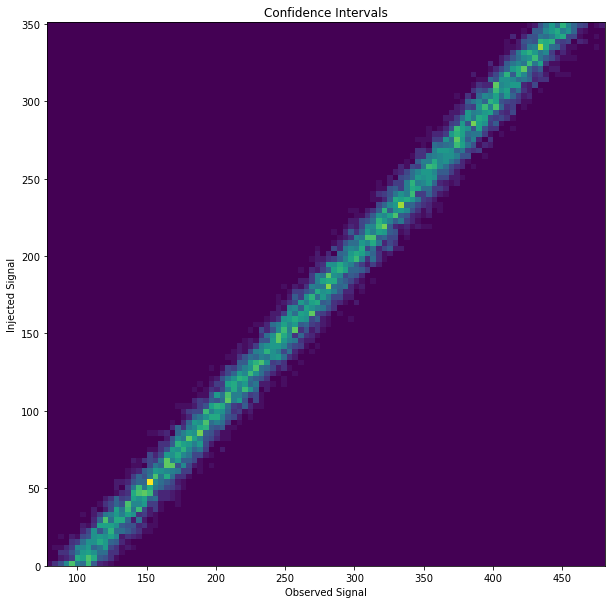

In [227]:
inject_sig2 = np.std(d) * 35
signaledges = np.linspace(0,inject_sig2,10000)
newSignal = d + signaledges

plt.rcParams["figure.figsize"] = (10,10)
fx, ax = plt.subplots(1, 1)

ax.hist2d(newSignal, signaledges, 100)
ax.set_title("Confidence Intervals")
ax.set_ylabel("Injected Signal")
ax.set_xlabel("Observed Signal")

From the 2D histogram we plotted, we can see that the observed signal has values about 100 greater than the values of injected signal.

Problem 3 B)

Now, we are going to see if we get the same answer as of problem 2 when we inject the same signal power. As we calculated, the injected signal for problem 2 is about 150. We will find corresponding particle counts for the same signal power in the injected signal for problem 3 and plot a histogram for the signal.

Text(0, 0.5, 'Probability')

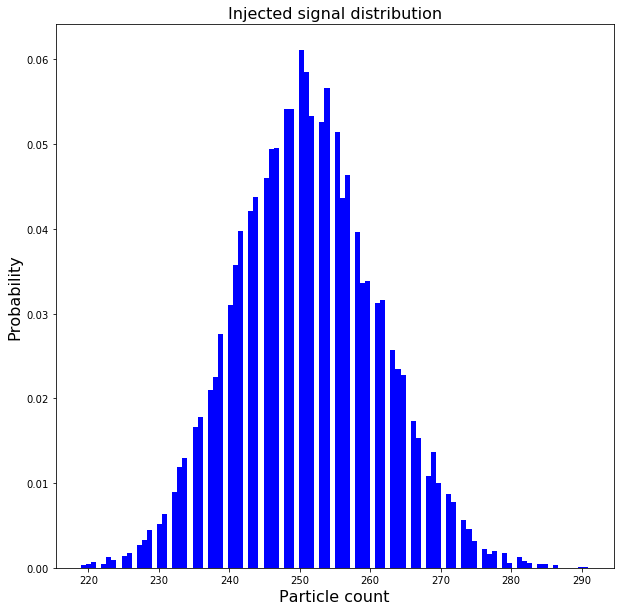

In [228]:
newSignal2 = d + signaledges[4300]
fx, ax = plt.subplots(1, 1)
ax.hist(newSignal2, 100, density=True, color = 'b', histtype = 'bar')
ax.set_title('Injected signal distribution', fontsize = 16)
ax.set_xlabel('Particle count', fontsize = 16)
ax.set_ylabel('Probability', fontsize = 16)

From the 1D histogram above, we can see that we got a similar distribution compared with problem 2.

Problem 3 C)

For this problem, we will reverse the process. We are going to find the true signal probability with a given observed signal value. In this part, we will use the signal value of 250. Since the observed signal is just the addition between our background distribution and the injected signal, the difference between observed signal and our background would be the injected signal.

Text(0, 0.5, 'Probability')

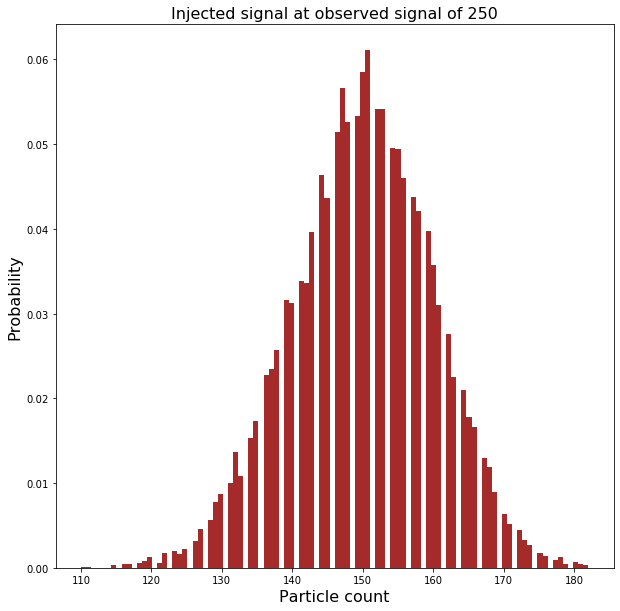

In [235]:
obs_sig = 250
sig = np.ones(10000)*obs_sig
injected_sig = sig - d
fx, ax = plt.subplots(1, 1)
ax.hist(injected_sig, 100, density=True, color = 'brown', histtype = 'bar')
ax.set_title('Injected signal at observed signal of 250', fontsize = 16)
ax.set_xlabel('Particle count', fontsize = 16)
ax.set_ylabel('Probability', fontsize = 16)

The histogram above shows the probability distribution of injected signal with a give observed signal of 250. As we can see, when the observed signal is 250, the mean of injected signal is about 150, which is consistant with the 2D histogram above.

Problem 3 D)

Now we will calculate the 1𝜎 uncertainty on the true signal strength with our chosen observed signal of 250. We will do this by first calculating the mean value of our injected signal, and then, use the results and survival function to calculate the probability of getting 1𝜎 uncertainty. Finally, we will use the probability to figure out the corresponding signal values.

In [236]:
mu = np.mean(injected_sig)
sigma = 1
prob= stats.norm.sf(sigma)
print(stats.poisson.isf(prob,mu))
print(stats.poisson.ppf(prob,mu))

162.0
138.0


For the 1𝜎 uncertainty, the upper bound is 162 and the lower bound of injected signal is 138.

Problem 3 E)

Our answer to part D is biased. As same as the answer to the problem 2, the injected value would be weaker than the observed signal. For a observed signal of 250, the treu strength of injected signal is always less than 250. Furthermore, from the answer to part D, the distance from two bounds to the mean value is equal. Therefore, we might conclude that, for the 1𝜎, it is symmetric.